Assorted plots
==============

A continuation of `misc-plots-1.ipynb`.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_evaluation_vs_clients

# Running for longer and with smaller $B$

Possibly a little ambitious, but here we go. These were on commit `28770a4`, before the refactor to add the dynamic power scaling scheme, so it'll be good to check whether the runs on `b3b4f07` (which use the same arguments) behave the same.

The value of $B$ chosen is just $\sqrt{0.00025}$, the square root of the power that appeared to be transmitted in the plots for commit `1b5e659` above.

In [2]:
results_dir = Path("../results-downloaded/20210721-smaller-pr/")

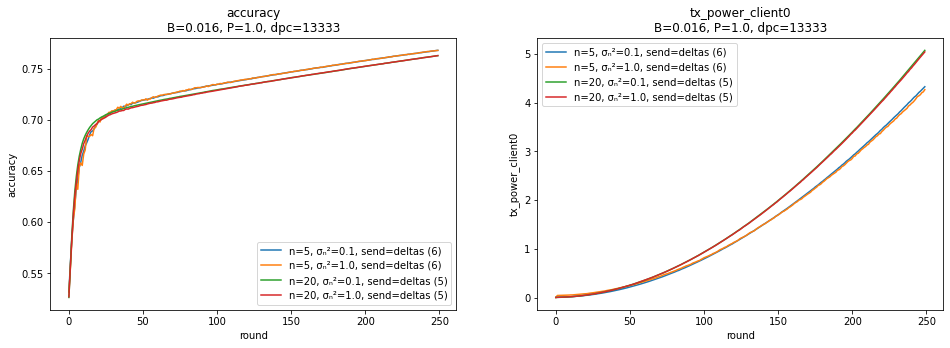

In [3]:
fixed_specs = {
    'rounds': 250,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
}
title_specs = {
    'parameter_radius': 0.016,
    'power': 1.0,
    'data_per_client': 13333,
}
series_specs = {
    'clients': '__all__',
    'noise': '__all__',
    'send': ['deltas'],
}
fields = ['accuracy', 'tx_power_client0']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

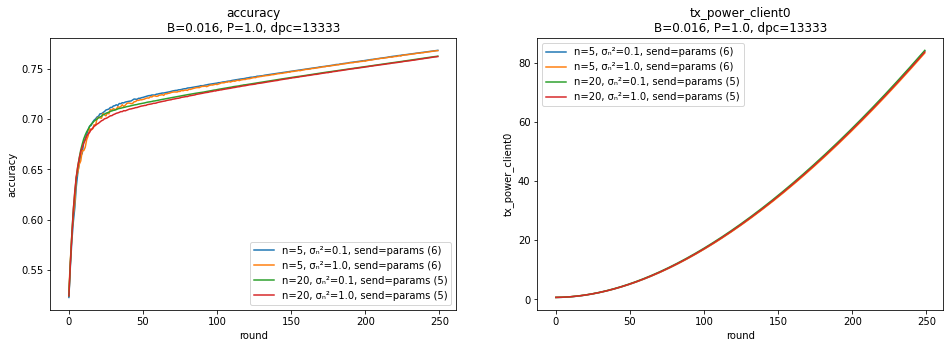

In [4]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

What I predicted about how attempting to scale $B$ by the order of magnitude predicted above would have second-order effects that made the estimate invalid turned out to be correct. We noticed in `ota-basic.ipynb` that the transmit power tends to increase as the model trains, because the model weights increase (from zero) towards their eventual value. So what's happening here is, the model is training faster, which in turn causes it to consume more power—which is why is quite quickly appears to spiral out of control. Recall that in `ota-basic.ipynb`, when we trained it until convergence, we found that the maximum power would imply $B = 3.4$, _i.e._ the power we were using before was _too much_, despite its appearing to be miniscule.

To confirm that this wasn't just my calculation of $B$ being incorrect, here are the same plots, but zoomed into rounds 1–20, which is the same number of rounds we were using before. Notice that the transmit power seems to be around 1.0, as expected:

(0.0, 2.0)

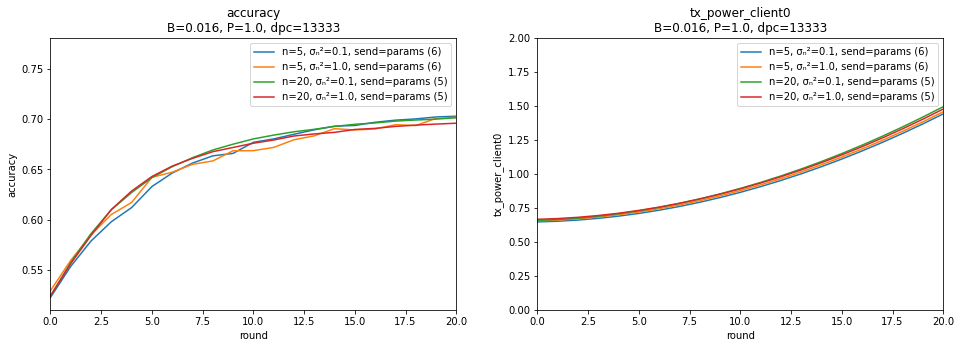

In [5]:
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)
plt.xlim((0, 20))
plt.ylim((0, 2))

To do something satisfying we'll need to control power dynamically, having it react to the current values that clients are attempting to send, if possible.

# The same plots, after the refactor

(hopefully)

These are on commit `b3b4f07`.

In [6]:
results_dir = Path("../results-downloaded/20210722-smaller-pr/")

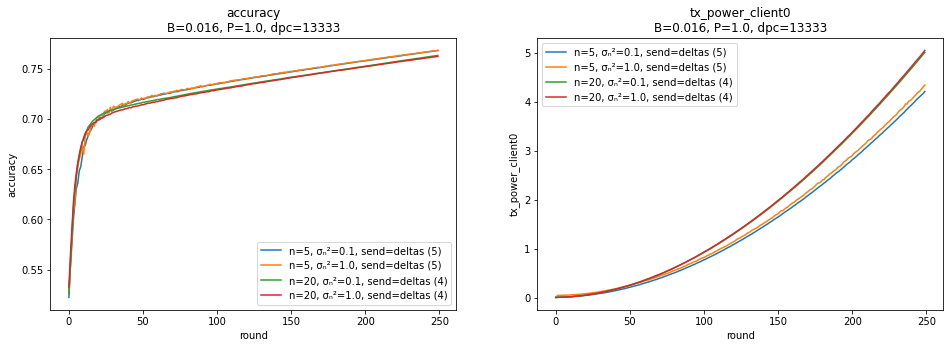

In [7]:
series_specs = {
    'clients': '__all__',
    'noise': '__all__',
    'send': ['deltas'],
}

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

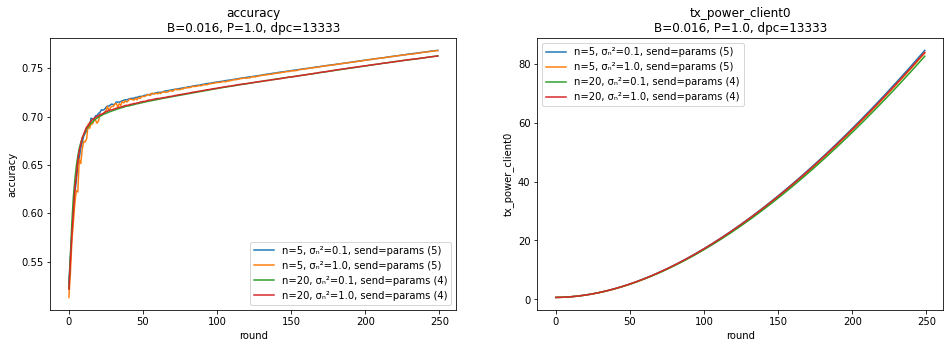

In [8]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

(0.0, 2.0)

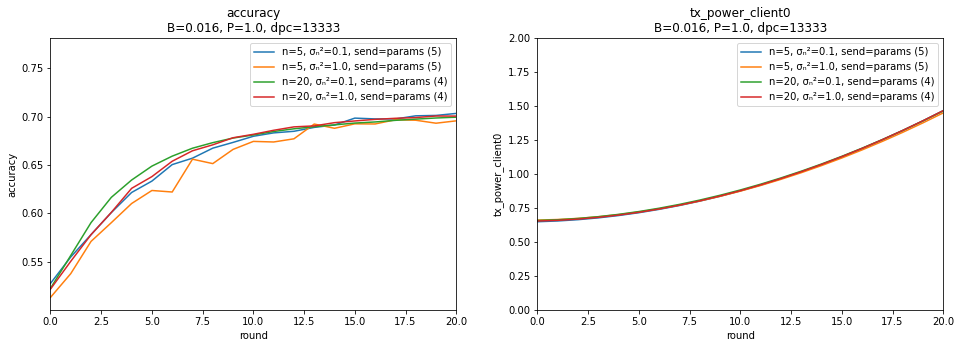

In [9]:
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)
plt.xlim((0, 20))
plt.ylim((0, 2))

# First dynamic power scaling plots

In [10]:
results_dir = Path("../results-downloaded/20210722-dynpower-1/")

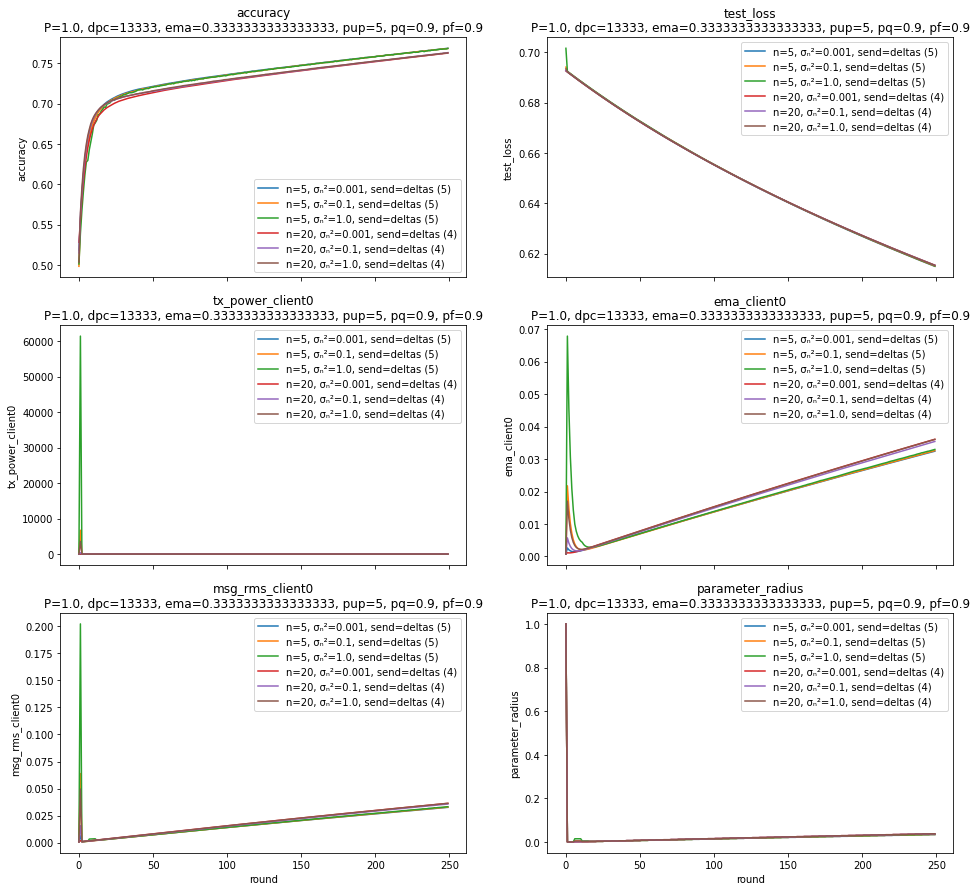

In [11]:
fixed_specs = {
    'rounds': 250,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
}
title_specs = {
    'power': 1.0,
    'data_per_client': 13333,
    'power_ema_coefficient': 1 / 3,
    'power_update_period': 5,
    'power_quantile': 0.9,
    'power_factor': 0.9,
}
series_specs = {
    'clients': '__all__',
    'noise': '__all__',
    'send': ['deltas'],
}
fields = ['accuracy', 'test_loss', 'tx_power_client0', 'ema_client0', 'msg_rms_client0', 'parameter_radius']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

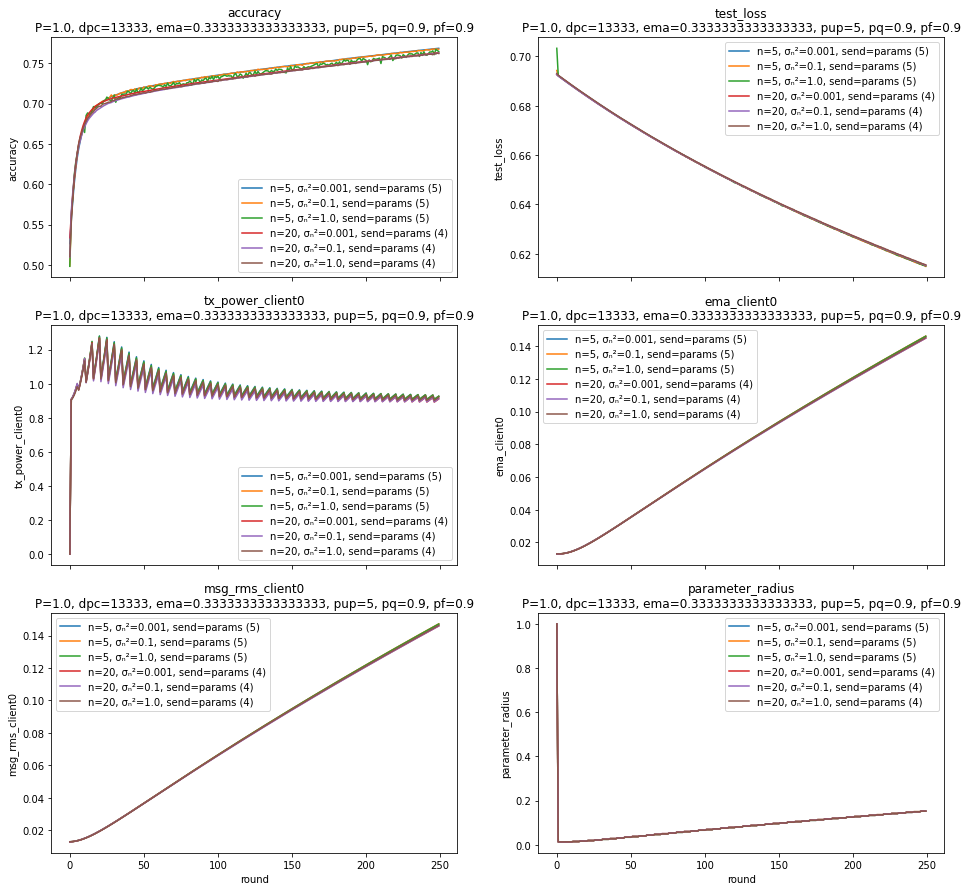

In [12]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

# Longer stochastic quantization plots

From commit `73f80f4`.

In [13]:
results_dir = Path("../results-downloaded/20210722-stocquant-1/")

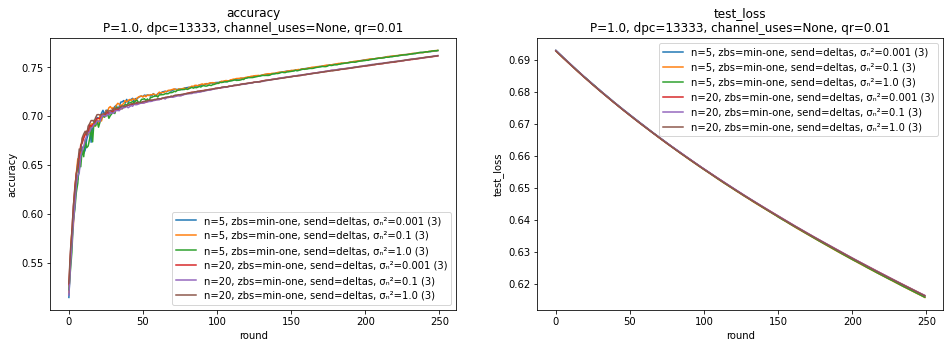

In [14]:
title_specs = {
    'power': 1.0,
    'data_per_client': 13333,
    'channel_uses': None,
    'quantization_range': 0.01,
}
series_specs = {
    'clients': '__all__',
    'zero_bits_strategy': '__all__',
    'send': ['deltas'],
    'noise': '__all__',
}
fields = ['accuracy', 'test_loss']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

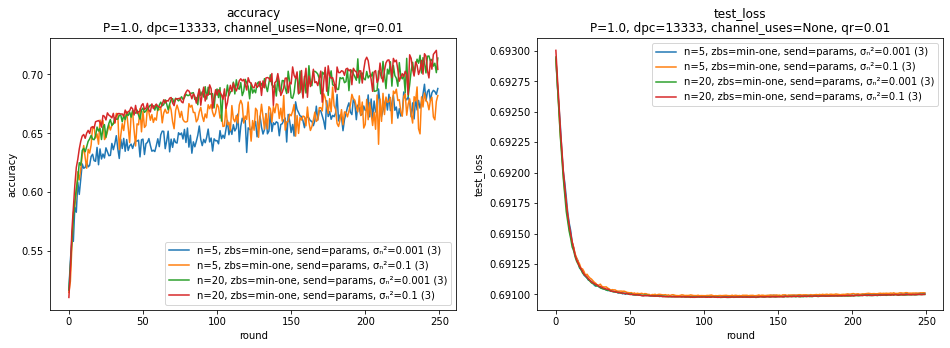

In [15]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

# More stochastic quantization plots

These are from commit `27a0711`, which refactored how the quantization range parameter is passed in.

In [16]:
results_dir = Path("../results-downloaded/20210722-stocquant-2/")

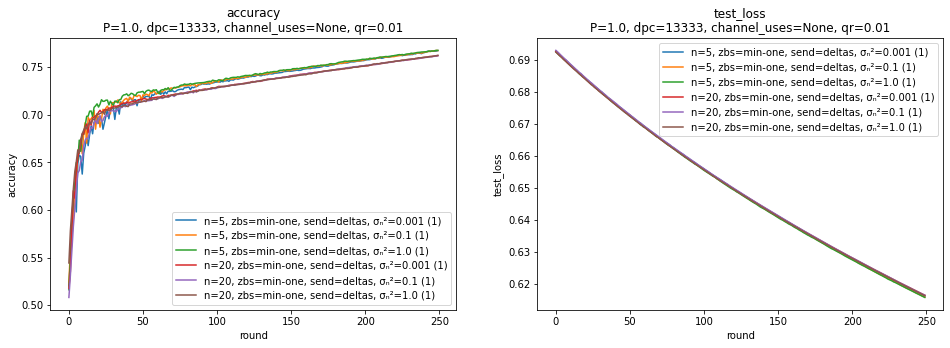

In [17]:
title_specs = {
    'power': 1.0,
    'data_per_client': 13333,
    'channel_uses': None,
    'quantization_range': 0.01,
}
series_specs = {
    'clients': '__all__',
    'zero_bits_strategy': '__all__',
    'send': ['deltas'],
    'noise': '__all__',
}
fields = ['accuracy', 'test_loss']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

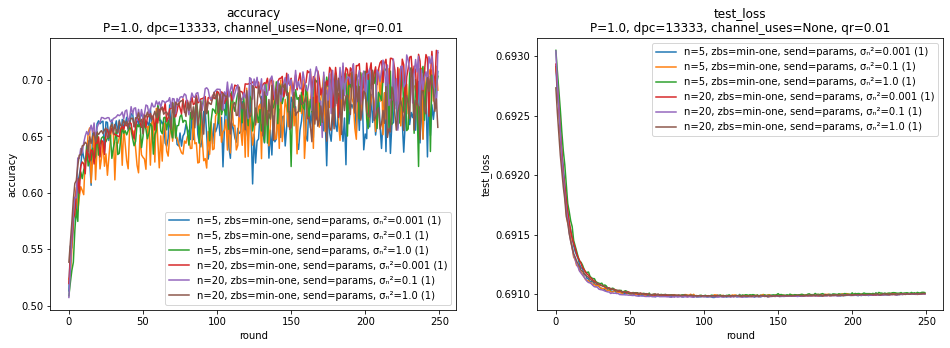

In [18]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

# Dynamic power again

On commit `8c7cffd`. These are the first plots after I implemented dynamic quantization range for the digital scheme, which shouldn't affect dynamic power scheme, but this did involve some refactoring of the dynamic power code to reuse the exponential moving average framework for dynamic quantization in the digital scheme.

In [19]:
results_dir = Path("../results-downloaded/20210722-dynpower-2/")

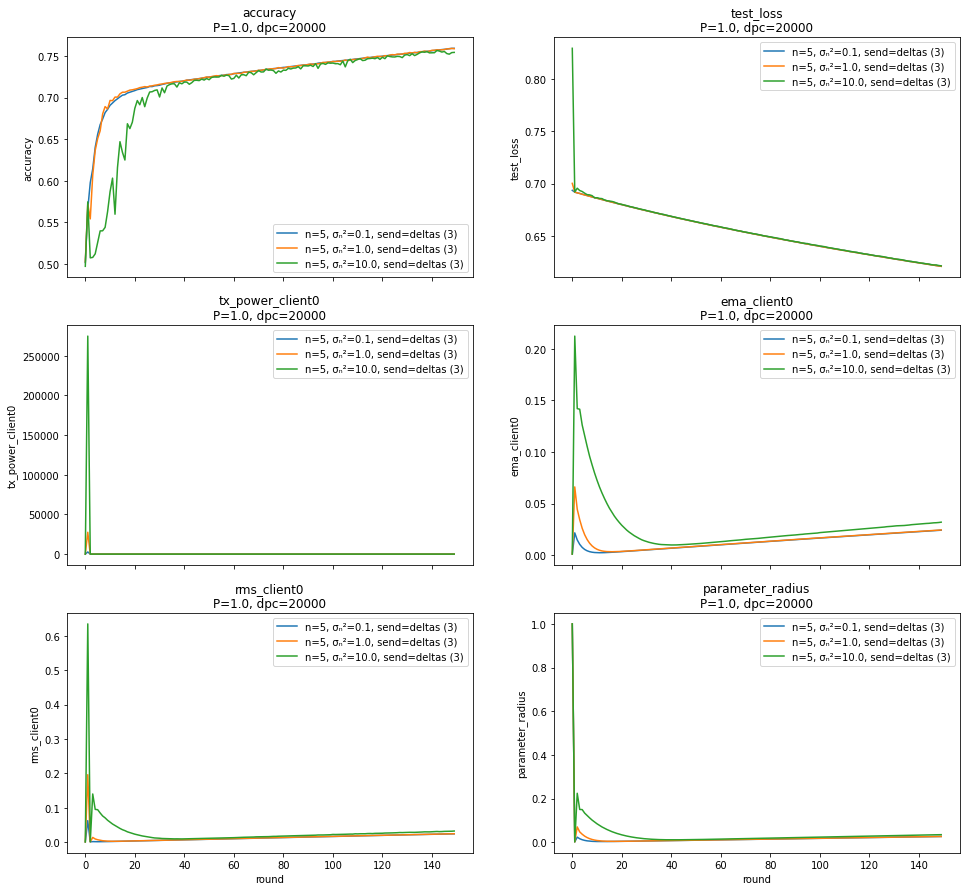

In [20]:
fixed_specs = {
    'rounds': 150,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
    'ema_coefficient': 1 / 3,
    'power_update_period': 1,
    'power_quantile': 0.9,
    'power_factor': 0.9,
}
title_specs = {
    'power': 1.0,
    'data_per_client': 20000,
}
series_specs = {
    'clients': [5],
    'noise': [0.1, 1.0, 10.0],  # 100 is a disaster and obscures most of these plots for this setting
    'send': ['deltas'],
}
fields = ['accuracy', 'test_loss', 'tx_power_client0', 'ema_client0', 'rms_client0', 'parameter_radius']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

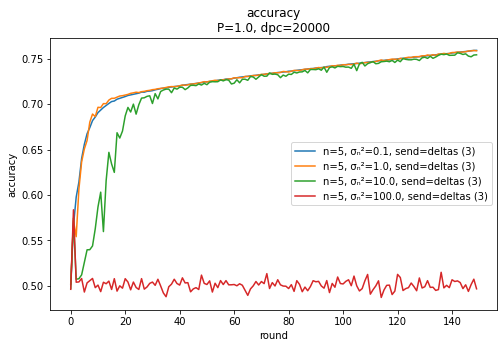

In [21]:
series_specs['noise'] = '__all__'
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs)

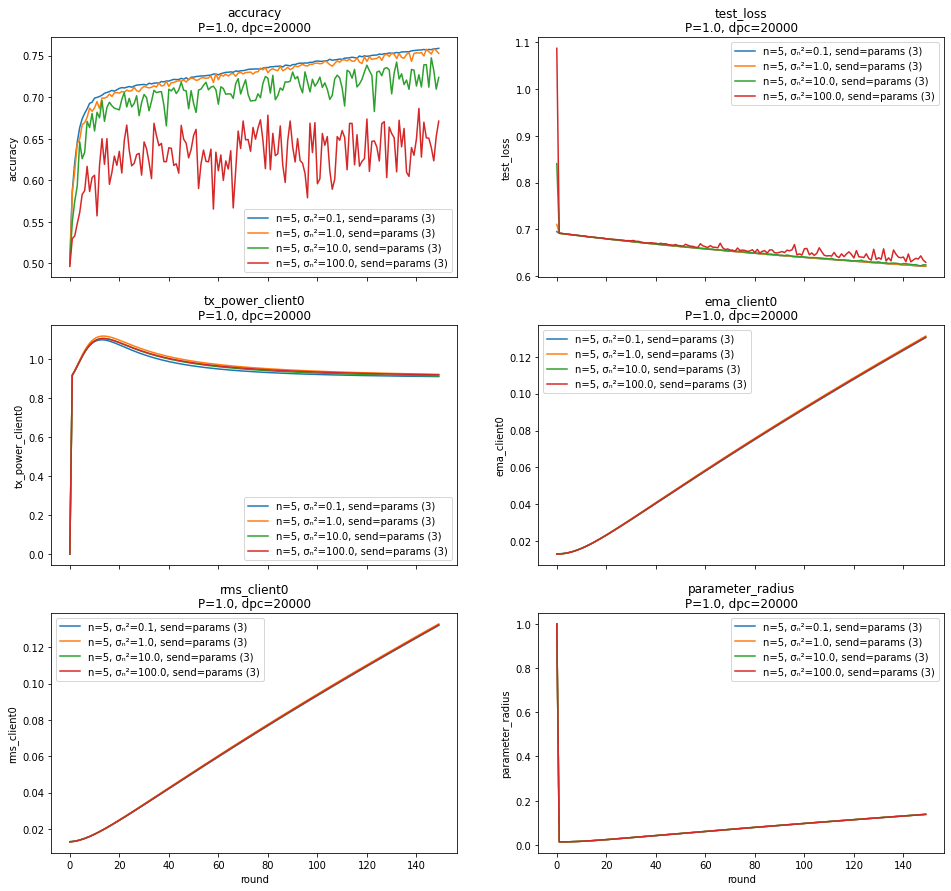

In [22]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

# Dynamic range

First, the "real" ones, using the `read-zero` option:

In [23]:
results_dir = Path("../results-downloaded/20210722-dynquant/")

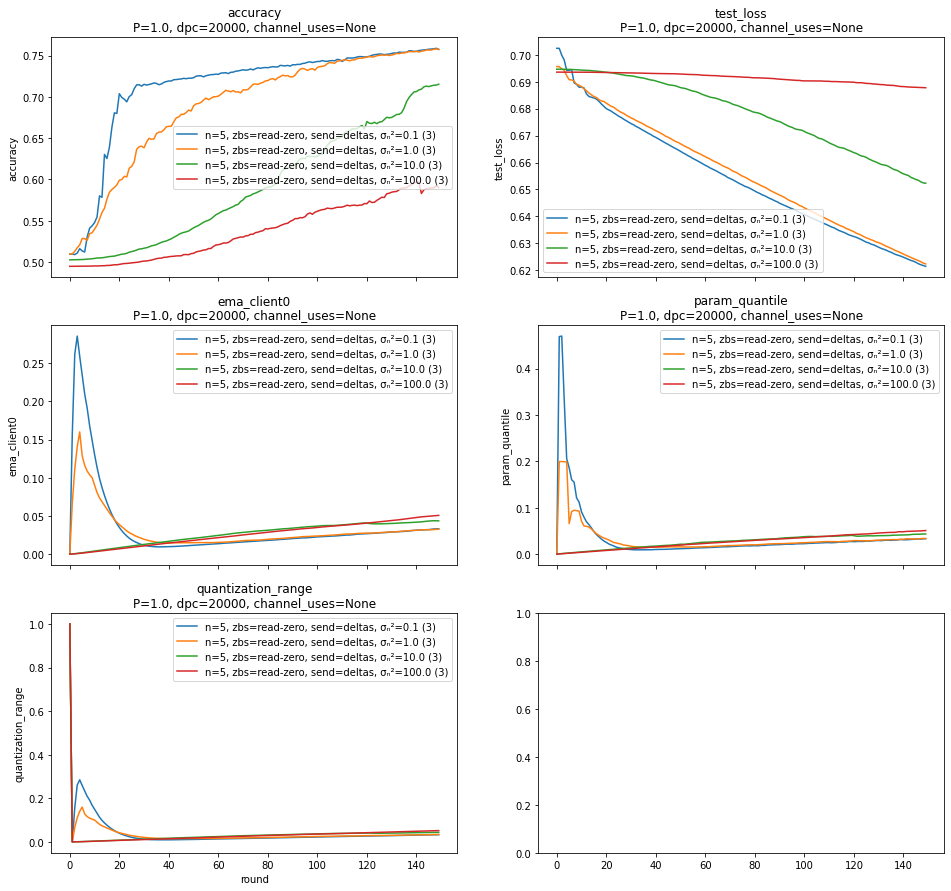

In [24]:
fixed_specs = {
    'rounds': 150,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
    'ema_coefficient': 1 / 3,
    'qrange_update_period': 1,
    'qrange_param_quantile': 0.9,
    'qrange_client_quantile': 0.9,
}
title_specs = {
    'power': 1.0,
    'data_per_client': 20000,
    'channel_uses': None,
}
series_specs = {
    'clients': [5],
    'zero_bits_strategy': ['read-zero'],
    'send': ['deltas'],
    'noise': '__all__',
}
fields = ['accuracy', 'test_loss', 'ema_client0', 'param_quantile', 'quantization_range']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

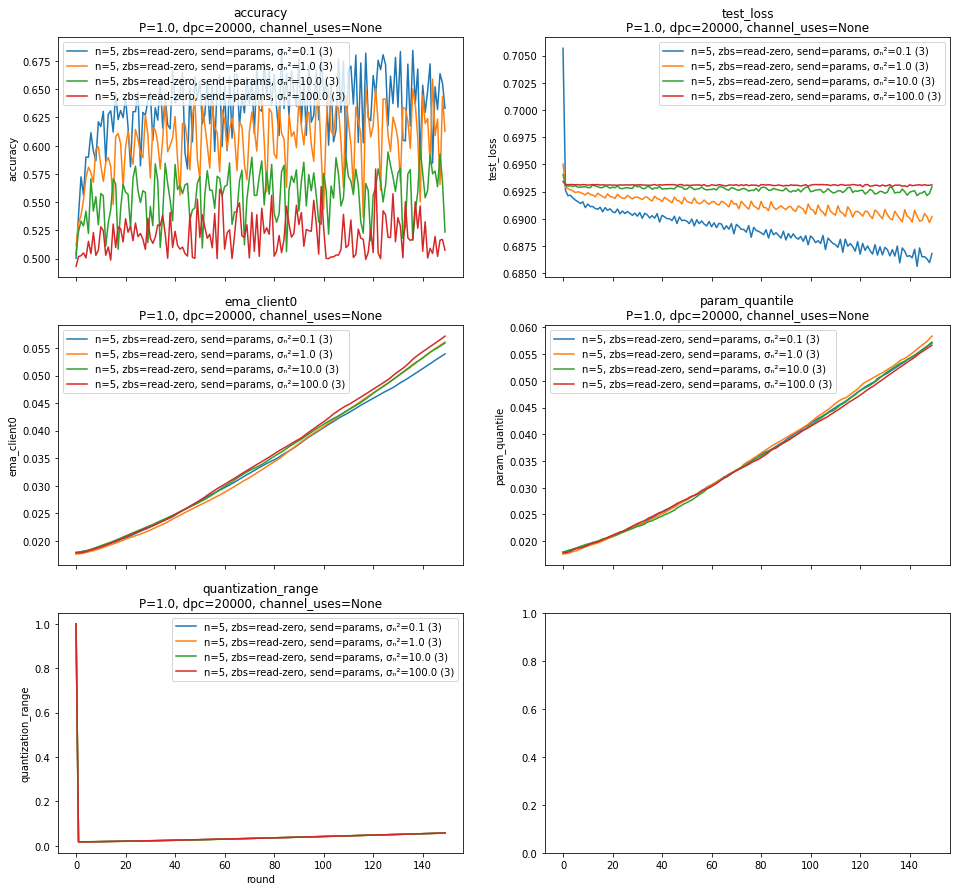

In [25]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

The `min-one` ones perform surprisingly well, but they also (by design) give the digital scheme an unrealistic advantage.

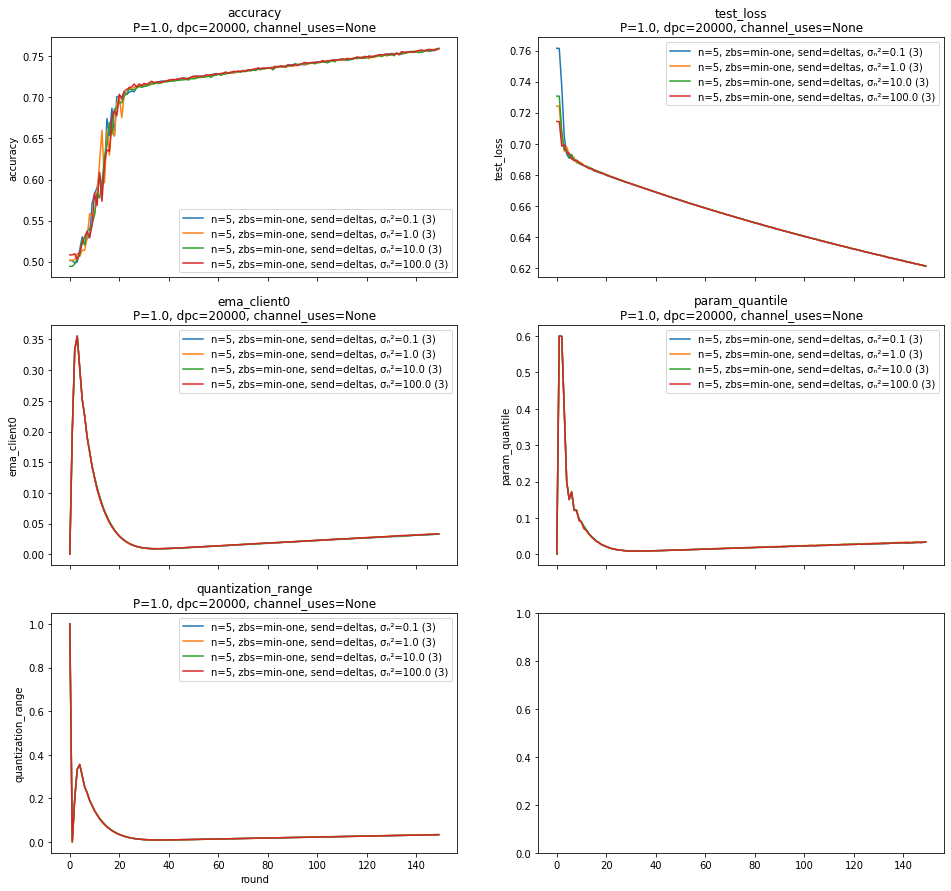

In [26]:
series_specs['zero_bits_strategy'] = ['min-one']
series_specs['send'] = ['deltas']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

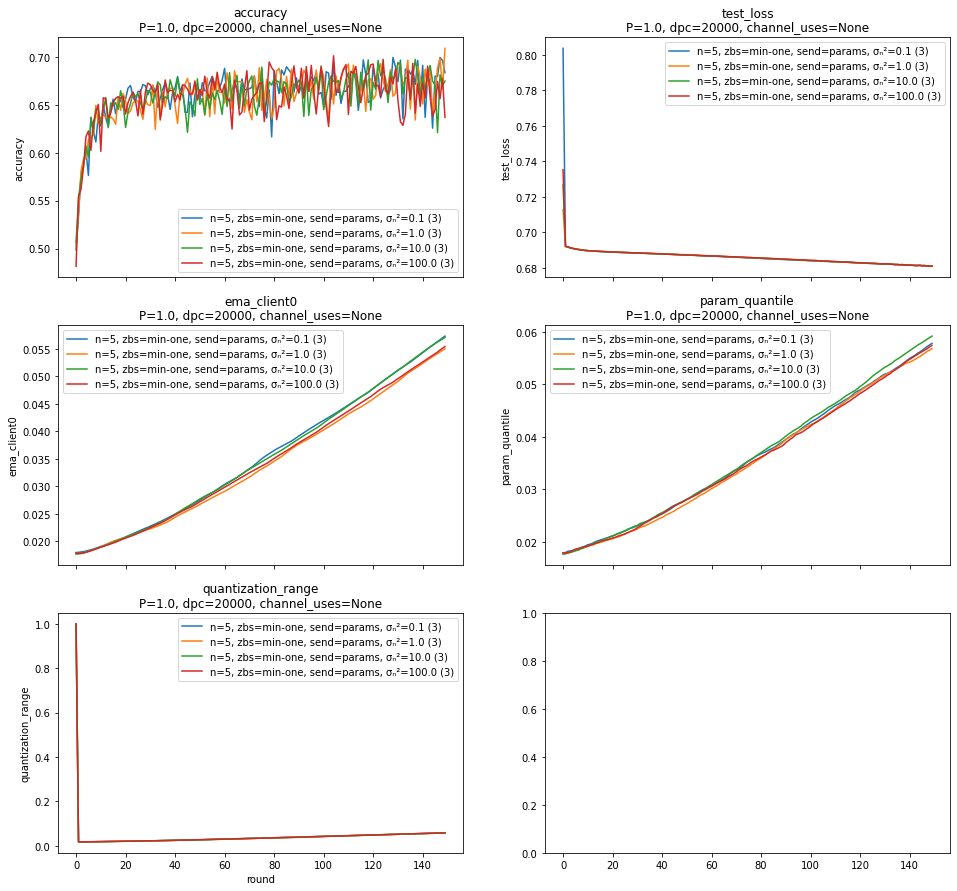

In [27]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

How many bits do we have in each of these settings?

In [28]:
# check in files

from numpy import log2
import pandas as pd
from plots_utils import all_subdirectories, get_args, get_eval

seen = []
reports = pd.DataFrame()
s = 2001  # number of channel uses

for directory in all_subdirectories(results_dir):
    args = get_args(directory)
    
    P = args['power']
    σₙ2 = args['noise']
    n = args['clients']
    if (P, σₙ2, n) in seen:
        continue
        
    index = directory.name
    reports.loc[index, 'P'] = P
    reports.loc[index, 'σₙ²'] = σₙ2
    reports.loc[index, 'n'] = n

    try:
        evaluation = get_eval(directory)
    except FileNotFoundError:
        continue

    reports.loc[index, 'bpcu eval'] = evaluation['bits_per_channel_use']
    reports.loc[index, 'bpr eval'] = evaluation['bits_per_round']

    seen.append((P, σₙ2, n))

reports['bpcu calc'] = log2(1 + reports['n'] * reports['P'] / reports['σₙ²']) / (2 * reports['n'])
reports['bpr calc'] = reports['bpcu calc'] * s
reports['bpcu diff'] = abs(reports['bpcu calc'] - reports['bpcu eval'])
reports['bpr diff'] = abs(reports['bpr calc'] - reports['bpr eval'])

reports.sort_index()

,P,σₙ²,n,bpcu eval,bpr eval,bpcu calc,bpr calc,bpcu diff,bpr diff
clients-20-noise-0.1-iteration-0,1.0,0.1,20.0,0.191276,382.743861,0.191276,382.743861,2.775558e-17,5.684342e-14
clients-20-noise-1.0-iteration-1,1.0,1.0,20.0,0.109808,219.725679,0.109808,219.725679,0.000000e+00,0.000000e+00
clients-20-noise-10.0-iteration-0,1.0,10.0,20.0,0.039624,79.287749,0.039624,79.287749,0.000000e+00,0.000000e+00
clients-20-noise-100.0-iteration-1,1.0,100.0,20.0,0.006576,13.158296,0.006576,13.158296,0.000000e+00,0.000000e+00
clients-5-noise-0.1-iteration-1,1.0,0.1,5.0,0.567243,1135.052311,0.567243,1135.052311,0.000000e+00,0.000000e+00
clients-5-noise-1.0-iteration-1,1.0,1.0,5.0,0.258496,517.250996,0.258496,517.250996,0.000000e+00,0.000000e+00
clients-5-noise-10.0-iteration-2,1.0,10.0,5.0,0.058496,117.050996,0.058496,117.050996,0.000000e+00,0.000000e+00
clients-5-noise-100.0-iteration-2,1.0,100.0,5.0,0.007039,14.084905,0.007039,14.084905,1.734723e-18,3.552714e-15
